In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
# Display first row of each table(For practice)
# measurement_first = session.query(Measurement).first()
# measurement_first.__dict__
station_first =session.query(Station).first()
station_first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x22c9ae11b00>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

# Exploratory Climate Analysis

In [12]:
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

for row in session.query(Measurement.prcp, Measurement.date).\
filter(Measurement.date > '2016-08-22').all():
    print(row)

(0.0, '2016-08-23')
(0.08, '2016-08-24')
(0.08, '2016-08-25')
(0.0, '2016-08-26')
(0.0, '2016-08-27')
(0.01, '2016-08-28')
(0.0, '2016-08-29')
(0.0, '2016-08-30')
(0.13, '2016-08-31')
(0.0, '2016-09-01')
(0.0, '2016-09-02')
(0.0, '2016-09-03')
(0.03, '2016-09-04')
(None, '2016-09-05')
(None, '2016-09-06')
(0.05, '2016-09-07')
(0.0, '2016-09-08')
(0.03, '2016-09-09')
(0.0, '2016-09-10')
(0.05, '2016-09-11')
(0.0, '2016-09-12')
(0.02, '2016-09-13')
(1.32, '2016-09-14')
(0.42, '2016-09-15')
(0.06, '2016-09-16')
(0.05, '2016-09-17')
(0.0, '2016-09-18')
(0.0, '2016-09-19')
(0.0, '2016-09-20')
(0.0, '2016-09-21')
(0.02, '2016-09-22')
(0.0, '2016-09-23')
(0.0, '2016-09-24')
(0.0, '2016-09-25')
(0.06, '2016-09-26')
(0.02, '2016-09-27')
(0.0, '2016-09-28')
(0.0, '2016-09-29')
(0.0, '2016-09-30')
(0.0, '2016-10-01')
(0.0, '2016-10-02')
(0.0, '2016-10-03')
(0.0, '2016-10-04')
(0.0, '2016-10-05')
(0.0, '2016-10-06')
(0.0, '2016-10-07')
(0.0, '2016-10-08')
(0.0, '2016-10-09')
(0.0, '2016-10-10')
(0

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

last_year_rain= session.query(Measurement.prcp, Measurement.date).\
filter(Measurement.date > '2016-08-22').all()

In [15]:
percip_df = pd.DataFrame(last_year_rain)
percip_df = percip_df.set_index('date')
percip_df=percip_df.sort_index()
percip_df

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15


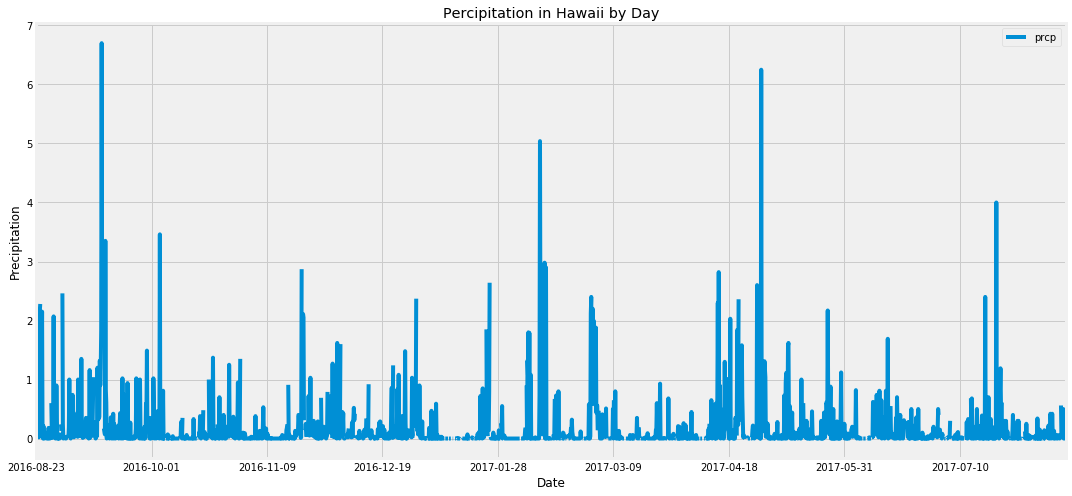

In [55]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize = (15, 7))
percip_df.plot(ax = ax, x_compat = True)

ax.set_title('Percipitation in Hawaii by Day')
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation')
plt.tight_layout()
plt.show()

![precipitation](Images/precipitation.png)

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
percip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [18]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.station).count()
print(station_count)

9


In [33]:
# What are the most active stations?
station_activity = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).all()


#  (i.e. what stations have the most rows)?    
# List the stations and the counts in descending order.
max_station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
print(max_station_activity[0][0])
max_station = max_station_activity[0][0]

USC00519281


In [41]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average  for the most active station?
low_temp= session.query(Measurement.tobs).\
filter(Measurement.station == max_station).\
order_by(Measurement.tobs).first()
print(low_temp)

high_temp= session.query(Measurement.tobs).\
filter(Measurement.station == max_station).\
order_by((Measurement.tobs).desc()).first()
print(high_temp)

(54.0,)
(85.0,)


In [49]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_temp= session.query(Measurement.tobs, Measurement.date).\
filter(Measurement.station == max_station).\
filter(Measurement.date > '2016-08-22').all()
print(last_year_temp)

[(77.0, '2016-08-23'), (77.0, '2016-08-24'), (80.0, '2016-08-25'), (80.0, '2016-08-26'), (75.0, '2016-08-27'), (73.0, '2016-08-28'), (78.0, '2016-08-29'), (77.0, '2016-08-30'), (78.0, '2016-08-31'), (80.0, '2016-09-01'), (80.0, '2016-09-02'), (78.0, '2016-09-03'), (78.0, '2016-09-04'), (78.0, '2016-09-05'), (73.0, '2016-09-06'), (74.0, '2016-09-07'), (80.0, '2016-09-08'), (79.0, '2016-09-09'), (77.0, '2016-09-10'), (80.0, '2016-09-11'), (76.0, '2016-09-12'), (79.0, '2016-09-13'), (75.0, '2016-09-14'), (79.0, '2016-09-15'), (78.0, '2016-09-16'), (79.0, '2016-09-17'), (78.0, '2016-09-18'), (78.0, '2016-09-19'), (76.0, '2016-09-20'), (74.0, '2016-09-21'), (77.0, '2016-09-22'), (78.0, '2016-09-23'), (79.0, '2016-09-24'), (79.0, '2016-09-25'), (77.0, '2016-09-26'), (80.0, '2016-09-27'), (78.0, '2016-09-28'), (78.0, '2016-09-29'), (78.0, '2016-09-30'), (77.0, '2016-10-01'), (79.0, '2016-10-02'), (79.0, '2016-10-03'), (79.0, '2016-10-04'), (79.0, '2016-10-05'), (75.0, '2016-10-06'), (76.0, '2

In [50]:
temp_df = pd.DataFrame(last_year_temp)
temp_df = temp_df.set_index('date')
temp_df=temp_df.sort_index()
temp_df

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
2016-08-29,78.0
2016-08-30,77.0
2016-08-31,78.0


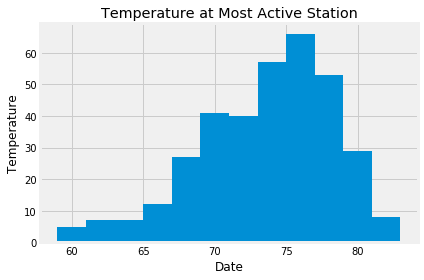

In [59]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.hist(temp_df["tobs"], bins=12)

plt.title('Temperature at Most Active Station')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()

![precipitation](Images/station-histogram.png)

In [60]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [62]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2017-06-10','2017-07-07'))

[(71.0, 77.2485549132948, 87.0)]
